# lastfmAPI for data incubator proposal Jan 2016

this script was committed to the GitHub DSAPI repo of mine

In [224]:
#
# http://www.last.fm/api/show/geo.getTopTracks
#
from pprint import pprint
import urllib, urllib2
import inspect
from collections import defaultdict


try:
    import json
except ImportError:
    import simplejson as json

class LastFM:
    def __init__(self ):
        self.API_URL = "http://ws.audioscrobbler.com/2.0/"
        self.API_KEY = "57ee3318536b23ee81d6b27e36997cde"
    
    def send_request(self, args, **kwargs):
        """this method essentially generates the desired resource URL to visit, which include all queries"""
        #Request specific args
        kwargs.update( args )
        #Global args
        kwargs.update({
          "api_key":  self.API_KEY,
          "format":   "json"
        })
        try:
            #Create an API Request
            url = self.API_URL + "?" + urllib.urlencode(kwargs)
            #print "url:", url
            #Send Request and Collect it
            data = urllib2.urlopen( url )
            #Print it
            response_data = json.load( data )
            #Close connection
            data.close()
            return response_data
        except urllib2.HTTPError, e:
            print "HTTP error: %d" % e.code
        except urllib2.URLError, e:
            print "Network error: %s" % e.reason.args[1]

    def get_top_artists(self, method, dict ):
        #find the key          
        args = {
            "method":	method,
            "limit":	10
        }
        for key in dict.keys():
          args[key] = dict[key]
        
        response_data = self.send_request( args )
        #print response_data
        
        print "~~~~~~~~~~~~~~" + str( args["method"] ) + "~~~~~~~~~~~~~~"
        
        
        print response_data
        
        
        print "------------------"
        #Get the first artist from the JSON response and print their name
        for artist in response_data["topartists"]["artist"]:
          print artist["name"]
        
        
    
        
        
    #deleted get_hyped_artist method
    #this is the first method I added off the starter script
    def get_similar_tracks(self, method, dict ):
      args = {
          "method":	method,
          "limit":	10
      }
      for key in dict.keys():
        args[key] = dict[key]
        print key, dict[key]
        
      response_data = self.send_request( args )
      print "~~~~~~~~~~~~~~" + str( args["method"] ) +"~~~~~~~~~~~~~~"
      #Get the first artist from the JSON response and print their name

      for artist in response_data["similartracks"]["track"]:
        print artist["name"], artist["artist"]["name"]

def main():
    last_request = LastFM()
    last_request.get_top_artists( "tag.gettopartists", { "tag": "rock" } )
    last_request.get_top_artists( "geo.gettopartists", { "country": "spain" } )
    #last_request.get_hyped_artists( "chart.getHypedArtists" )
    last_request.get_similar_tracks( "track.getsimilar", {
                                    "track": "Ray of Light",
                                    "artist": "Madonna"})

#if __name__ == "__main__": main()

## get a user list of n by traverse friends

as a work around of not able to get a list of users for studying user behavior, we get friends of a user and get friends of frieds:

In [22]:
#try: get friends of a user
#note that the starter code is a class, but here I am not doing it within a class context
def get_frds(method, dict ):
    last_request = LastFM()
    friends=[]
    #find the key          
    args = {
        "method":	method,
    }
    for key in dict.keys():
      args[key] = dict[key]
    response_data = last_request.send_request( args )
    for user in response_data["friends"]["user"]:
        #print user["name"]
        friends.append(user['name'])
    return friends

In [34]:
#call get frds and get a seed list
seed=get_frds( "user.getfriends", { "user": "damarys_eira" } )


url: http://ws.audioscrobbler.com/2.0/?format=json&api_key=57ee3318536b23ee81d6b27e36997cde&method=user.getfriends&user=damarys_eira


In [133]:
len(seed)

50

In [136]:
all_users=seed[:]
def traverse_data(seed):
    for user in seed:
        this_usr_friends=get_frds("user.getfriends", { "user": user } )
        all_users.extend(this_usr_friends)
        num_users=len(all_users)
        if num_users<20:
            traverse_data(this_usr_friends)
        print num_users
    return all_users

In [ ]:
#use a limit of 20 in depth, you can get almost 2000 friends

In [137]:
user_list=traverse_data(seed)

url: http://ws.audioscrobbler.com/2.0/?format=json&api_key=57ee3318536b23ee81d6b27e36997cde&method=user.getfriends&user=Netko3
62
url: http://ws.audioscrobbler.com/2.0/?format=json&api_key=57ee3318536b23ee81d6b27e36997cde&method=user.getfriends&user=ASummerKiss
90
url: http://ws.audioscrobbler.com/2.0/?format=json&api_key=57ee3318536b23ee81d6b27e36997cde&method=user.getfriends&user=boscopud
140
url: http://ws.audioscrobbler.com/2.0/?format=json&api_key=57ee3318536b23ee81d6b27e36997cde&method=user.getfriends&user=sploosh999
190
url: http://ws.audioscrobbler.com/2.0/?format=json&api_key=57ee3318536b23ee81d6b27e36997cde&method=user.getfriends&user=Feamelwen
193
url: http://ws.audioscrobbler.com/2.0/?format=json&api_key=57ee3318536b23ee81d6b27e36997cde&method=user.getfriends&user=engelnit
243
url: http://ws.audioscrobbler.com/2.0/?format=json&api_key=57ee3318536b23ee81d6b27e36997cde&method=user.getfriends&user=Arielle1111
293
url: http://ws.audioscrobbler.com/2.0/?format=json&api_key=57ee3

In [138]:
len(user_list)

1997

In [139]:
print user_list[:100]

[u'Netko3', u'ASummerKiss', u'boscopud', u'sploosh999', u'Feamelwen', u'engelnit', u'Arielle1111', u'isitbeer30yet', u'wangle-mcdangle', u'Infinitas25', u'bc_ranger', u'Noellse', u'SrtaVento', u'Blackshine2010', u'LWTBP', u'karamazove', u'Tronta', u'akees', u'darthpaula', u'Rebe-k', u'Landaree', u'dharma24', u'Alfodur', u'Aidoma', u'Maquiavella', u'Cyantio', u'LaDoucereuse', u'ashzurya', u'suomalainen02', u'zelfbloemen', u'ophelie_', u'numunedir', u'mansardamansard', u'vratsagirl', u'kgkeller', u'johnTMcNeill', u'aino_island', u'JosephCagdason', u'Misery_Crown', u'wOoDy__', u'Nagamenon', u'EmiHaug', u'marek446', u'Stanley_l', u'lebeauserge', u'Abetancourt_', u'technozenexp', u'ivasheva', u'mmorgoth', u'jesterhead1', u'dj_soetsi', u'annkat', u'nati_aka_loko', u'dejzen', u'Jim_Dove', u'zaijan', u'hellique', u'Deepdigger', u'apfelhaeuptling', u'Tigrrra88', u'lollo-love', u'Tigranica', u'Chrilu', u'Perfect8Line', u'gerstar48', u'Secret-Santa', u'steamboat58', u'satchxmas', u'damarys_eira',

## getTopArtist for each user

In [91]:
def get_user_top_artists(method, dict ):
    last_request = LastFM()
    artist_names=[]
    artist_mbid=[]
    #find the key          
    args = {
        "method":	method,
        #"limit":	10
    }
    for key in dict.keys():
      args[key] = dict[key]

    response_data = last_request.send_request( args )


    #print "~~~~~~~~~~~~~~" + str( args["method"] ) + "~~~~~~~~~~~~~~"
    #print response_data
    #print "------------------"
    #Get the first artist from the JSON response and print their name
    for art in response_data["topartists"]["artist"]:
        artist_names.append(art["name"])
        artist_mbid.append(art["mbid"])
    return artist_names,artist_mbid

In [92]:
top_names,top_mbid=get_user_top_artists( "user.getTopArtists", { "user": "damarys_eira" } )


url: http://ws.audioscrobbler.com/2.0/?format=json&api_key=57ee3318536b23ee81d6b27e36997cde&method=user.getTopArtists&user=damarys_eira


## for each artist, get its similar artists

In [260]:
def get_similar_artists(method, dict ):
    last_request = LastFM()
    artist_names=[]
    #somehow the returned similar artists for this doesn't contain mbid.
    #artist_mbid=[]
    #find the key          
    args = {
        "method":	method,
        "limit":	20
    }
    for key in dict.keys():
      args[key] = dict[key]
    
    
    response_data = defaultdict(lambda:None,last_request.send_request( args ))


    #print "~~~~~~~~~~~~~~" + str( args["method"] ) + "~~~~~~~~~~~~~~"
    #print response_data
    #print "------------------"
    #Get the first artist from the JSON response and print their name
    if response_data["similarartists"]:
        for art in response_data["similarartists"]["artist"]:
            #print art["name"]
            artist_names.append(art["name"])
    else:
        print "key error on response data: no similar artist for ", dict['artist']

    #artist_mbid.append(art["mbid"])
    return artist_names

In [369]:
sim_arti=get_similar_artists( "artist.getSimilar", { "artist": artist } )
print len(sim_arti)

20


20


In [265]:
#get all similar artists for one artist
def get_all_sim_artists(artist):
    """takes an artist as input and returns a dict with the artist name as key and a list of sim artists as value"""
    sim_arti=get_similar_artists( "artist.getSimilar", { "artist": artist } )
    #sim_dict={artist:sim_arti}
    return sim_arti





## for each user, get top artists (50)

In [254]:
def add_to_artist(seen,data):
    """mainatin a set of unique artist in seen, by adding un-seen artists to seen from data"""
    seen.update(data)                        # add the new values to the set
    #print(seen)
    return seen




In [370]:

#usage: getting the top artist for each user in the user list
user_top_artist_dict={}
all_artists=set()
for user in user_list:
    top_names,top_mbid=get_user_top_artists( "user.getTopArtists", { "user": user } )
    user_top_artist_dict[user]=top_names
    add_to_artist(all_artists,top_names)
    
        
    
    #with open(path, "a") as myfile:
     #   top=",".join(top_names)
    #  top=user+","+top
       # myfile.write(top.encode('utf-8'))
        #myfile.write('\n')
 

KeyboardInterrupt: 

In [259]:
#write user list to the csv, write only those lines where there are 50 top artists, without comma in their names
path="user_top_artist.csv"
f=open(path,"w")
f.write("")
f.close()

for key in user_top_artist_dict:
    if len(user_top_artist_dict[key])==50:
        if not check_comma(user_top_artist_dict[key]):
            write_to_csv(key,user_top_artist_dict[key],path)




                

## get similar artists for all artist, now at limit=20

In [374]:

#get the dict of artist similarity 
#there is a unicode problem with API, so I ignored all names with non-ascii chars
#initially we're doing 100 sim artists, seems to much to handle. now limit 20
art_sim_dict={}
for artist in all_artists:
    a=artist.encode('ascii', 'ignore')
    if a!='':
        sim_art=get_all_sim_artists(a)
        art_sim_dict[artist]=sim_art






key error on response data: no similar artist for      ""
key error on response data: no similar artist for  ther Realm
key error on response data: no similar artist for  Marek Brezovsk & Oskar Rzsa
key error on response data: no similar artist for    
key error on response data: no similar artist for  Cdric Vuille
key error on response data: no similar artist for  Star kola
key error on response data: no similar artist for  Trumen von Aurora


KeyboardInterrupt: 

In [375]:
len(art_sim_dict)

2856

In [ ]:
#now we have top 100 similar artists for 10000 artists
#however, we may just need 20, so that you can finish in time.

In [376]:
#check how many lines in the sim artists csv would have 100 artists per line
count=0
for key in art_sim_dict:
    print key, len(art_sim_dict[key])
    

Green Sun 20
In The Midst Of Lions 20
Peter Sarstedt 20
Lesley Garrett 20
Eliza Doolittle 20
Evelyn Evelyn 20
Queens of the Stone Age 20
Kyte 20
oOoOO 20
Toad The Wet Sprocket 20
Crosby, Stills & Nash 20
Ledisi 20
Everything Is Made in China 20
Tom Barabas 20
The Duke Spirit 20
Ataraxia 20
Gerry & The Pacemakers 20
Neil Young & Crazy Horse 20
Nightcore 20
Acid Bath 20
Jim Croce 20
Nirvana 20
Randy Travis 20
Zeraphine 20
Massive Attack 20
iamamiwhoami 20
Left Lane Cruiser 20
Centhron 20
Teitur 20
Exxasens 20
Agnes Obel 20
Blue Rodeo 20
Procol Harum 20
Goldfrapp 20
Montrose 20
John Fullbright 20
Alex North 20
SHINee 20
Hawkwind 20
Chickenfoot 20
Kauan 20
Funker Vogt 20
Screaming Females 20
Gustavo Santaolalla 20
Chris Tomlin 20
Ian Dury 20
The Obsessed 20
Tim Buckley 20
UPLIFT SPICE 20
a-ha 20
Jason Lytle 20
Burzum 20
Gary Allan 20
Peter Wolf 20
John Fahey 20
Billy Bragg 20
Vast 20
Big Jim Sullivan 20
Arvo Pärt 20
Vilayat Khan 20
S.O.D. 20
MAM 20
Streams of Europe 20
Twisted Sister 20
As

In [240]:
import re
def check_comma(list):
    """return true if there is a comma in any string of the list"""
    for artist in list:
        if re.search("\,",artist):
            return True
    return False

#serialize the results of the art_sim_dic so far
def write_to_csv(key,value_list,path):
    """input is a key and its value, a list of strings to be written on one line of csv """
    with open(path, "a") as myfile:
        top = ",".join(value_list)
        #add key to the first column
        top = key + ","+top
        myfile.write(top.encode('utf-8'))
        #myfile.write(top)
        myfile.write('\n')


In [253]:
#write the whole dict to file
path='artist_sim100.csv'
f=open(path,"w")
f.write("")
f.close()
for key in art_sim_dict:
    if len(art_sim_dict[key])==100:
        if not check_comma(art_sim_dict[key]):
            write_to_csv(key,art_sim_dict[key],path)


In [326]:
#read in artist similarity csv file
import csv, sys

def read_csv_dict(path):
    """reads in the csv file where the first col is key and rest cols are value and return the dict"""
    csv.field_size_limit(sys.maxsize)
    csv_file_object= csv.reader(open(path, 'rU'))

    dic=defaultdict(list)
    for row in csv_file_object:
        dic[row[0]]=row[1:]
    return dic

In [352]:
#get the artist similarity dict
art_sim_dic_read=read_csv_dict('artist_sim100.csv')

In [351]:
#get the user top artist dict
user_top_art_dic = read_csv_dict('user_top_artist.csv')

In [323]:
for key in art_sim_dic_read:
    print key,len(art_sim_dic_read[key])

You.May.Die.In.The.Desert 100
Secret Sun 100
Los Bunkers 100
Mysterious Art 100
Nortec Collective 100
Kyte 100
Alexandra Burke 100
Tom Barabas 100
The Duke Spirit 100
All Shall Perish 100
Meadows End 100
And So I Watch You From Afar 100
Little Nemo 100
XP8 100
Makoto Ozone 100
Bikini Kill 100
Jane Vain & The Dark Matter 100
My Little Lover 100
Pzychobitch 100
Eleh 100
Humming Urban Stereo 100
Faramarz Aslani 100
Adrian Berinde 100
Tahiti 80 100
Mishka 100
Burzum 100
The Underwater 100
Abominable Putridity 100
Hecate Enthroned 100
Staccato du Mal 100
Menahan Street Band 100
Rocketship 100
Nicoleta Luciu 100
Werkraum 100
Elijah Blake 100
Twisted Sister 100
Rotor 100
Busta Rhymes 100
My Insanity 100
War from a Harlots Mouth 100
David Nevue 100
Charles Manson 100
Michael E 100
Thinking Plague 100
Lendi Vexer 100
Miguel Campbell 100
Arbovirus 100
Simone White 100
Prong 100
Jan Garbarek 100
Tulipa Ruiz 100
Esthetic Education 100
Dj Gruff 100
The Pretty Things 100
cruyff in the bedroom 100
H1

In [341]:
for key in user_top_art_dic:
    print key,len(user_top_art_dic[key])

Waldfee6 50
DarkstarCon 50
lustucruu 50
my_propeller 50
Chrilu 50
Dkovt 50
ashurge 50
forest_embrace 50
SkyggerHela 50
barium62 50
Technocide 50
Kathi_Langley 50
StrongWombyn 50
andyduarte123 50
falserevrend 50
Andka_1 50
vacuous-trance 50
noriween 50
Tj_Kitsune 50
Azra27 50
onkellu 50
AlexandreTex 50
esteniocs 50
babsierosana 50
mymuse97 50
Norbert_Machete 50
zuh_desperado 50
insurgente42 50
de_rien 50
sakeena 50
northerndeer 50
steamboat58 50
Gremena 50
Olexii_Kazakov 50
DeathInJanuary 50
ultimatejetman 50
Zergeisterung 50
zezymcurty 50
JeGarr97 50
estxx 50
pep_mo 50
jakoblindhagen 50
sesforsure 50
Iason_Mink 50
subatomicdreams 50
Julia_lacrd 50
IslamRemains 50
Jaime-Lannister 50
Hellgie 50
d2214 50
J_paty 50
ExistThrough 50
Narwahl1950 50
Arielle1111 50
MegkIlb 50
uhohspagettio 50
ZotoTheSecond 50
qzp 50
mountainhoney 50
krass-linux 50
Devils1674 50
Disgeae 50
MrSatanislav 50
lotusC 50
sjh2 50
SchwarzerBaum 50
missdbauchery 50
DSC_Arminia 50
WishingAngel 50
Esoree 50
AllieBish 50
Dl

In [346]:
def compute_sim_score(artists,art_sim_dic_read):
    """give a list of 50 top artists of a user, compute the total similarity score"""
    score=0
    for art in artists:
        #if art_sim_dic_read != []:
        sim_artists=art_sim_dic_read[art]
        for arti in artists:
            if arti in sim_artists and arti!=art:
                score+=1
                artists.remove(arti)
                #print artists
    return score


    

In [353]:
#try compute artists similarity of one user's top artists
artists=user_top_art_dic['Dkovt'][:]

In [355]:
compute_sim_score(artists,art_sim_dic_read)

22

In [378]:
#compute sim score for all users
asdict=defaultdict(list,art_sim_dict)
all_user_scores=[]
for k,v in user_top_art_dic.iteritems():
    artists=v
    this_score=compute_sim_score(artists,asdict)
    all_user_scores.append(this_score)
    
    

/Users/zangsir/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [363]:
import matplotlib.pyplot as plt
%matplotlib inline


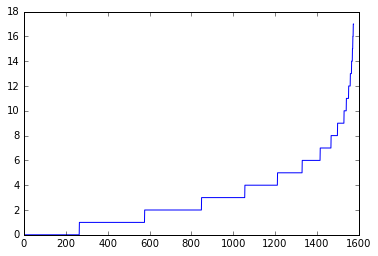

In [379]:
plt.plot(sorted(all_user_scores))

(array([ 265.,  312.,  272.,  207.,  156.,  118.,    0.,   86.,   52.,
          31.,   31.,   11.,   11.,    0.,    8.,    6.,    4.,    2.,
           2.,    2.]),
 array([  0.  ,   0.85,   1.7 ,   2.55,   3.4 ,   4.25,   5.1 ,   5.95,
          6.8 ,   7.65,   8.5 ,   9.35,  10.2 ,  11.05,  11.9 ,  12.75,
         13.6 ,  14.45,  15.3 ,  16.15,  17.  ]),
 <a list of 20 Patch objects>)

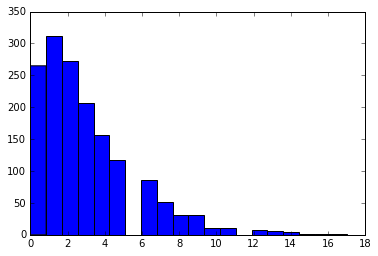

In [383]:
plt.hist(sorted(all_user_scores),bins=20)